In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import collections  as mc
from matplotlib.animation import FuncAnimation, PillowWriter  
from matplotlib.colors import to_rgb, to_rgba
%matplotlib notebook 
# mpl.use('Agg')

from math import sin, cos, pi

import numpy as np
import numpy.linalg as la

In [2]:
thetas = [0.35 * pi]
alphas = [0]

d_thetas = [0]
d_alphas = [0]

eps = 1e-3
its = 1_00_000

g = 9.81

c2 = lambda x : cos(x) * cos(x)

In [3]:
# def test(a, b, c):
#     print(a, b, c)
    
# x = np.asarray([1, 2, 3])
# test(*x)

[1, 2, 3, 4, 5][-1]

5

In [4]:
def a(x):
    return np.asarray(x)

def rk(d, x, h):
    """
    Returns an increment according to Runge-Kutta 4
    """
    
    x = a(x)
    k1 = d(*(x))
    k2 = d(*(x + h * (k1/2)))
    k3 = d(*(x + h * (k2/2)))
    k4 = d(*(x + h * k3))
    
    return (1./6.) * h * (k1 + k2 + k3 + k4)

In [5]:
pd_theta = lambda theta, alpha : g * 2. * sin(theta) + \
                  g * sin(theta + alpha)


pd_alpha = lambda d_theta, d_alpha, theta, alpha : - d_theta * (d_theta + d_alpha) * sin(alpha) \
                + g * sin(theta + alpha)


d_theta = lambda alpha, p_theta, p_alpha : (p_theta - p_alpha - p_alpha * cos(alpha)) \
                / (2 - cos(alpha)**2) 


d_alpha = lambda alpha, p_theta, p_alpha : (p_alpha * (3 + 2* cos(alpha)) - p_theta - p_theta * cos(alpha)) \
                / (2 - cos(alpha)**2)

In [6]:
alpha = alphas[-1]
theta = thetas[-1]

dt = d_thetas[-1]
da = d_alphas[-1]

p_theta = 0
p_alpha = 0

for i in range(its):
    
    p_theta += rk(pd_theta, (theta, alpha), eps)
    p_alpha += rk(pd_alpha, (dt, da, theta, alpha), eps)
        
    theta += rk(d_theta, (alpha, p_theta, p_alpha), eps)
    alpha += rk(d_alpha, (alpha, p_theta, p_alpha), eps)
    
    dt = d_theta(alpha, p_theta, p_alpha)
    da = d_alpha(alpha, p_theta, p_alpha)
    
    thetas.append(theta)     
    alphas.append(alpha)
    
    d_thetas.append(dt) 
    d_alphas.append(da)

In [7]:
assert len(alphas) == len(thetas)
n = len(alphas)

alphas = np.asarray(alphas)
thetas = np.asarray(thetas)

d_alphas = np.asarray(d_alphas)
d_thetas = np.asarray(d_thetas)

# mine
x1 = np.sin(thetas)
y1 = np.cos(thetas)

x2 = np.sin(thetas) + np.sin(alphas + thetas)
y2 = np.cos(thetas) + np.cos(alphas + thetas)

# wikipedia
# x1 = np.sin(thetas)
# y1 = - np.cos(thetas)

# x2 =   np.sin(thetas) + np.sin(alphas)
# y2 = - np.cos(thetas) - np.cos(alphas)

# y1 = -y1
# y2 = -y2

<IPython.core.display.Javascript object>


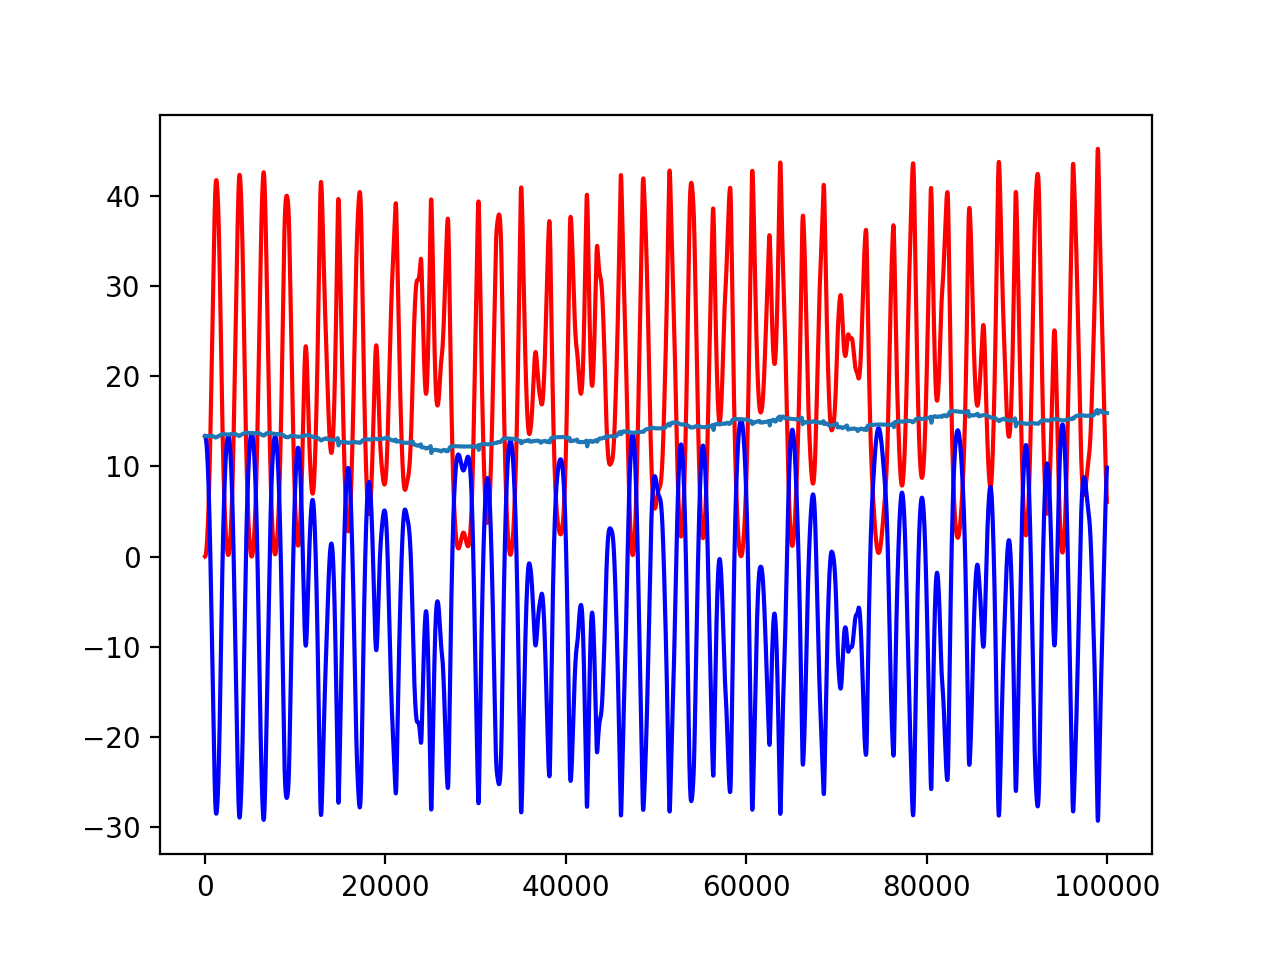

In [8]:
# kinetic enegry
T = d_thetas ** 2 + 0.5 * (d_thetas + d_alphas) ** 2 + d_thetas * (d_thetas + d_alphas) * np.cos(alphas)
# potential energy
V = g * 2. * np.cos(thetas) + g * np.cos(thetas + alphas)

plt.plot(T[1:], color='r')
plt.plot(V[1:], color='b')
plt.plot((T+V)[1:])
         

<IPython.core.display.Javascript object>


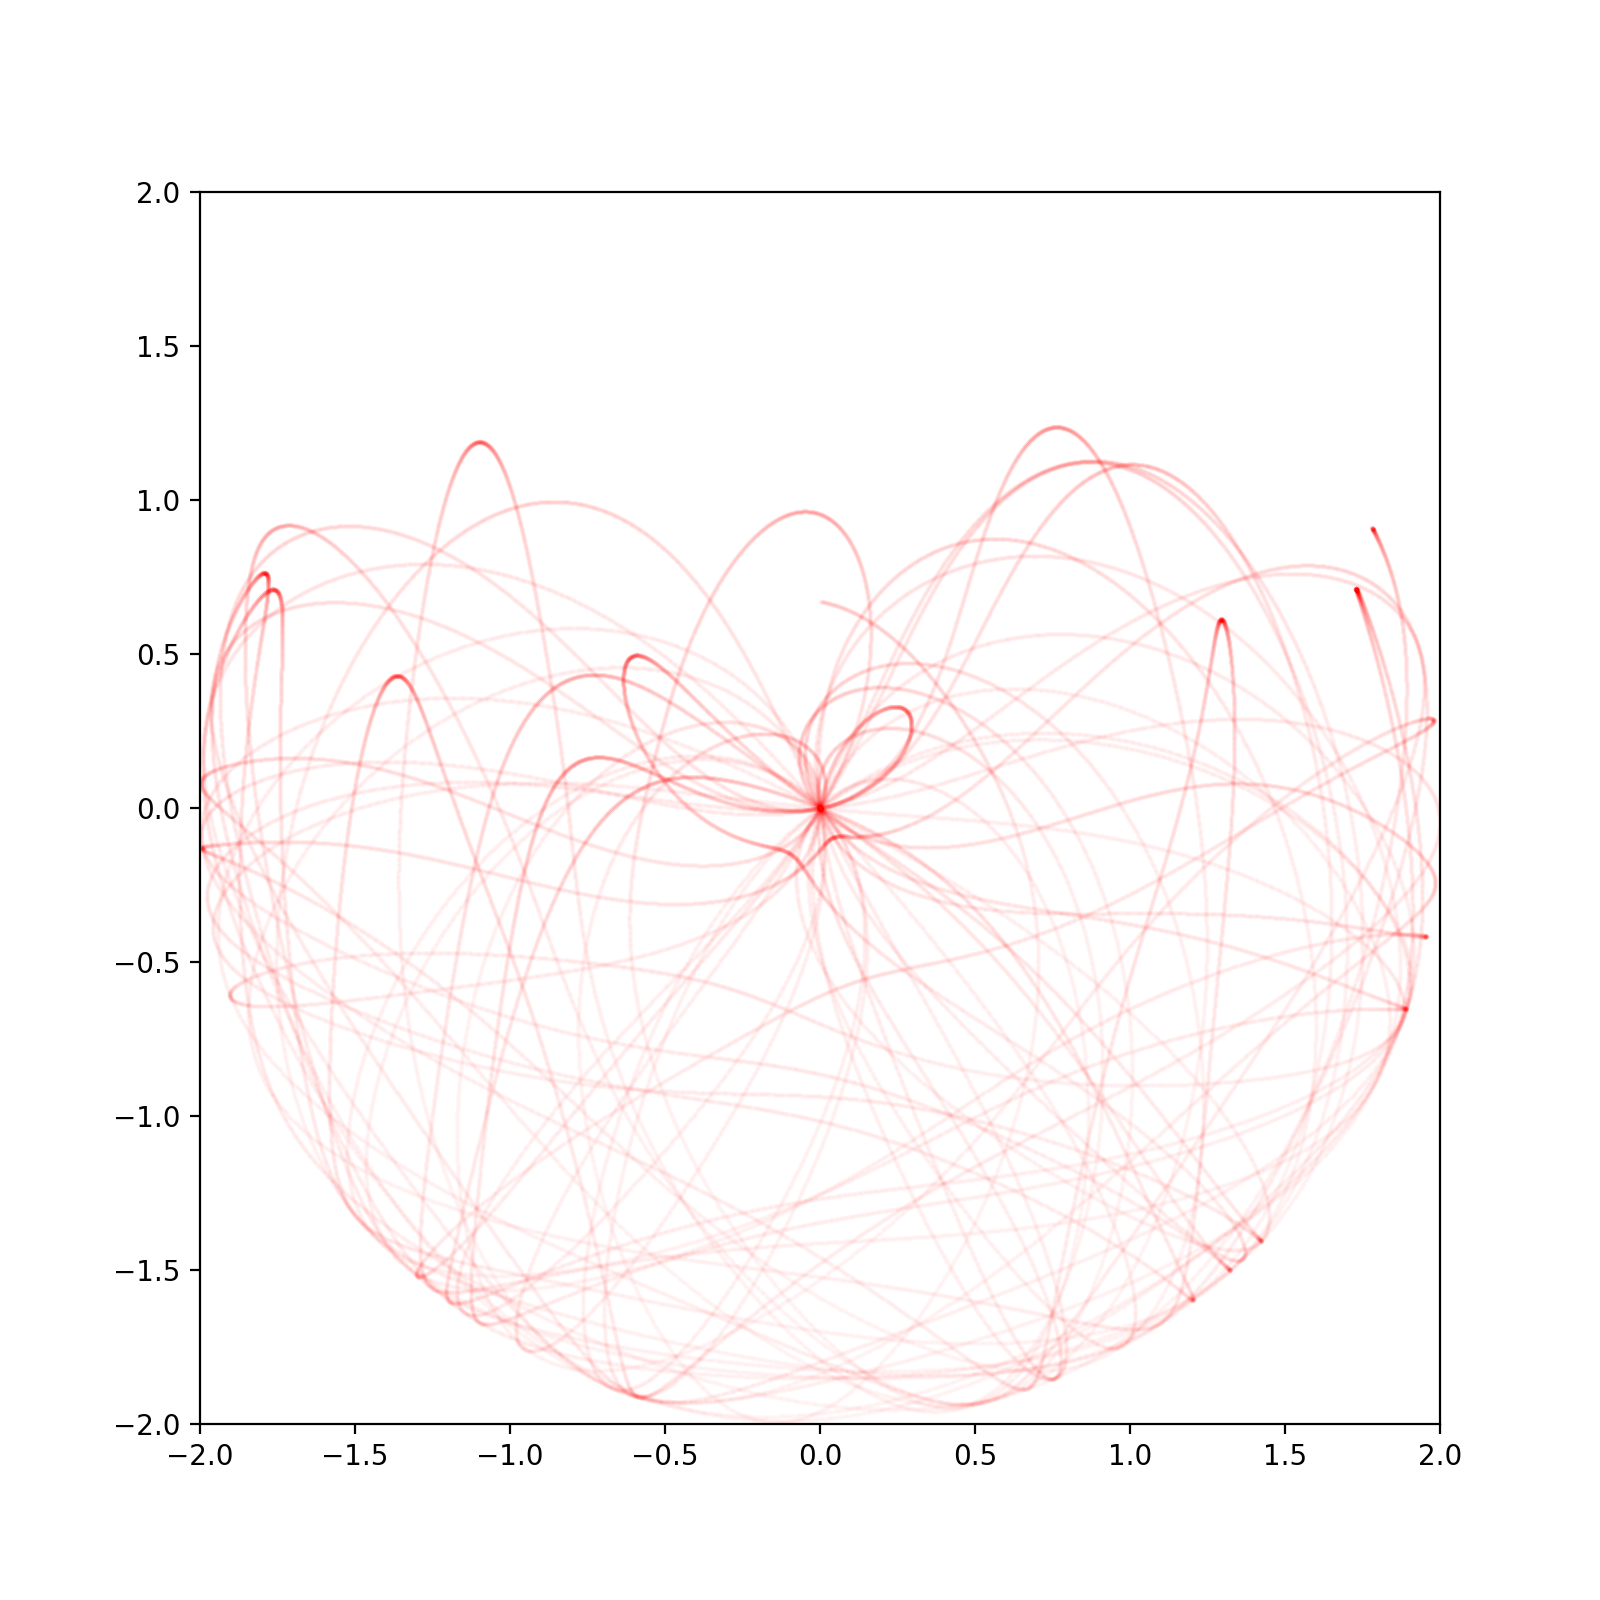

In [9]:
plt.figure(figsize=(8,8))
ax = plt.gca()

# ax.scatter(x1, y1, color='b', alpha = 0.01, s=1)
ax.scatter(x2, y2, color='r', alpha=0.01, s=1)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2);

# r1, r2 = [], []
# for i in range(0, n, 40):
#     r1.append( [(0., 0.), (x1[i], y1[i])] )
    
#     r2.append( [(x1[i], y1[i]), (x2[i], y2[i])] )
    
# r1 = mc.LineCollection(r1, alpha=0.01)
# r2 = mc.LineCollection(r2, alpha=0.01)

# ax.add_collection(r1)
# ax.add_collection(r2)
    


<IPython.core.display.Javascript object>


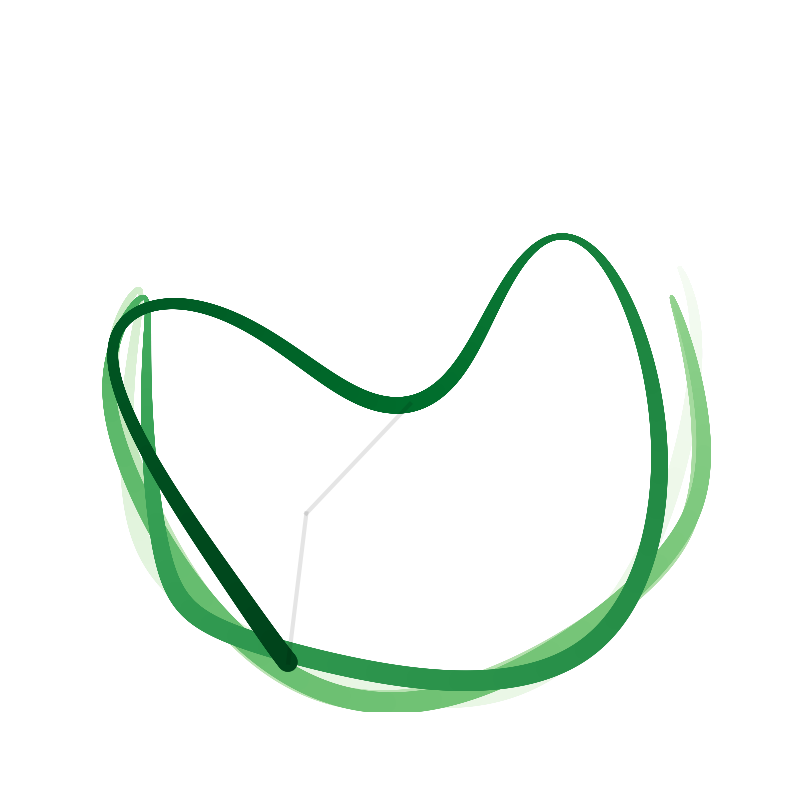

In [25]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()
ax.axis('off')


t = 100_000 # tailsize
cl = 1 - np.arange(t)/t

sizes = T # np.abs(np.asarray(d_alphas))

def scatter(ax, x, y, c, a, **kwarg):
    r, g, b = to_rgb(c)
    color = [(r, g, b, alpha) for alpha in a]
    ax.scatter(x, y, c=c, **kwarg)
    
def update(i):
    ax.clear()
    ax.axis('off')

    ax.set_xlim(-2.05, 2.05)
    ax.set_ylim(-2.05, 2.05)
    
    ax.plot([0, x1[i]], [0, y1[i]], color='k', alpha=0.1)
    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], color='k', alpha=0.1)
    
    ax.scatter( x2[max(0, i-t):i], y2[max(0, i-t):i], s=sizes[max(0, i-t):i], c=cl if i > t else cl[:i], cmap='Greens_r')
  
ani = FuncAnimation(fig, update, range(0, 32_000, 100)) 
# plt.show()


In [26]:
writer = PillowWriter(fps=25)
ani.save("double_pendulum_green.gif", writer=writer, dpi=160)  

In [ ]:
    # mine
#     pd_theta =  g * 2. * sin(theta) + g * sin(theta + alpha)
#     pd_alpha =  - d_theta * (d_theta + d_alpha) * sin(alpha) + g * sin(theta + alpha)

    # wikipedia 
#     pd_theta = - 0.5 * (  d_theta * d_alpha * sin(theta - alpha) + 3 * g * sin(theta) )
#     pd_alpha = - 0.5 * (- d_theta * d_alpha * sin(theta - alpha) +     g * sin(alpha) )
    
#     # Euler's method
#     p_theta = p_theta + eps * pd_theta(theta, alpha)
#     p_alpha = p_alpha + eps * pd_alpha(dt, da, theta, alpha)

    # mine
#     ca = cos(alpha)
#     div = 2 - ca**2 
#     d_theta = p_theta - p_alpha - p_alpha * ca
#     d_theta /= div
    
#     d_alpha = p_alpha * (3 + 2* ca) - p_theta - p_theta * ca
#     d_alpha /= div
    
    # check if correctly inverted
#     pc_theta = d_theta * (3 + 2 * ca) + d_alpha * (1 + ca)
#     pc_alpha = d_theta * (1 + ca)     + d_alpha 
    
#     print( p_theta,  p_alpha)
#     print(pc_theta, pc_alpha)
#     print()

    # wikipedia
#     d_theta = 6 * ( 2 * p_theta - 3 * cos(theta - alpha) * p_alpha) / (16 - 9 * cos(theta-alpha)**2)
#     d_alpha = 6 * ( 8 * p_alpha - 3 * cos(theta - alpha) * p_theta) / (16 - 9 * cos(theta-alpha)**2)
